In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## PGe 334 Homework 3a Question 3

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dnicolasespinoza/GeomechanicsJupyter/refs/heads/master/UndergradHomework/HW3/Mancos_Unconf100_PL7.dat',delimiter='\t')

Area = np.pi * (0.5**2)
D = 1
L =2.01

axstress = df['Axial Stress (lb/in2)'] = df['F (lb)'] / Area
axstrain = df['Axial Strain'] = df['Xa (in)'] / L
radstrain = df['Radial Strain'] =df['Ya (in)'] / D
volstrain = df['Volumetric Strain'] = axstrain + 2 * radstrain

print(df.head())







   Time (s)    F (lb)   Xa (in)       Ya (in)  Axial Stress (lb/in2)  \
0       0.0  73.58195  0.000017  4.199700e-07              93.687449   
1       1.0  71.87975 -0.000003  5.989200e-07              91.520140   
2       2.0  74.27057  0.000010  2.117630e-06              94.564227   
3       3.0  71.82877  0.000002  1.582470e-06              91.455230   
4       4.0  73.09907  0.000004  2.198230e-06              93.072627   

   Axial Strain  Radial Strain  Volumetric Strain  
0      0.000009   4.199700e-07       9.350587e-06  
1     -0.000002   5.989200e-07      -5.158366e-07  
2      0.000005   2.117630e-06       9.258444e-06  
3      0.000001   1.582470e-06       4.257025e-06  
4      0.000002   2.198230e-06       6.475266e-06  


## Plotting

(i) axial stress versus axial strain, (ii) axial stress versus radial strain, and (iii) axial stress versus volumetric strain. (Plot axial stress in the vertical axis.)

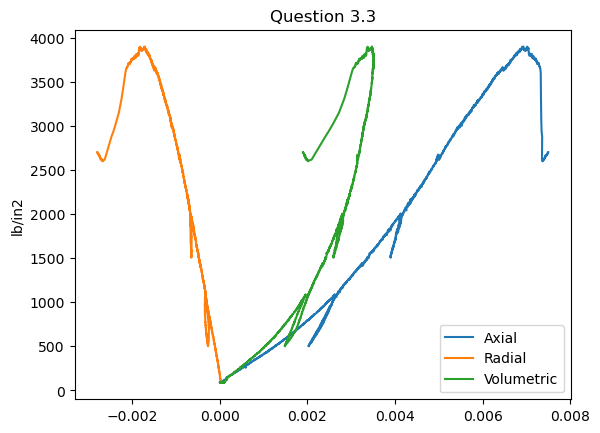

In [10]:
plt.plot(axstrain,axstress, label = "Axial")
plt.plot(radstrain,axstress, label = "Radial")
plt.plot(volstrain,axstress, label = "Volumetric")
plt.ylabel('lb/in2')
plt.title('Question 3.3')
plt.legend()



## Question 3.4

Utilizing linear curve fitting, compute Young's modulus and Poisson's ratio in the interval of axial strain between 0.0028 and 0.0040. You may need to plot radial strain versus axial strain to calculate the Poisson's ratio (using a linear regression).

In [24]:
min = 0.0028
max = 0.004

sub_df = df[(axstrain>=min) & (axstrain<=max)]
print(sub_df.head())


#since the equation for poissons ratio is -er/ea, radial strain will be the "y values"

rad = sub_df['Radial Strain']
axial = sub_df['Axial Strain']
stress = sub_df['Axial Stress (lb/in2)']
slope, intercept = np.polyfit(axial,rad,1)
youngs,_ =np.polyfit(axial,stress,1)

print("The poissons ratio is", slope * -1) 
print('The Youngs Modulus is', youngs)

      Time (s)    F (lb)   Xa (in)   Ya (in)  Axial Stress (lb/in2)  \
1582  1580.764  918.6461  0.005633 -0.000350            1169.656542   
1583  1581.764  926.7661  0.005639 -0.000351            1179.995247   
1584  1582.764  932.8717  0.005650 -0.000351            1187.769139   
1585  1583.764  914.9712  0.005651 -0.000355            1164.977514   
1586  1584.764  935.9374  0.005662 -0.000354            1191.672509   

      Axial Strain  Radial Strain  Volumetric Strain  
1582      0.002803      -0.000350           0.002102  
1583      0.002806      -0.000351           0.002104  
1584      0.002811      -0.000351           0.002108  
1585      0.002811      -0.000355           0.002102  
1586      0.002817      -0.000354           0.002109  
The poissons ratio is 0.2510679231130392
The Youngs Modulus is 485418.6072792867
